#### Installing dependicies

In [77]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kumay\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kumay\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kumay\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^

In [78]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
aiohttp                      3.9.5
aiosignal                    1.3.1
anyio                        4.1.0
apyori                       1.1.2
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
astroid                      3.0.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
asyncio                      3.4.3
attrs                        23.1.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
bs4                          0.0.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1

In [79]:
import tensorflow as tf
import os

In [80]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

#### Removing dodgy images

In [81]:
import cv2
import imghdr

In [82]:
data_dir = "data"

In [83]:
image_exts = ["jpeg","jpg","png","bmp"]

In [84]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print("Issue with image {}".format(image_path))

#### Load Data

In [85]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 171 files belonging to 2 classes.


In [87]:
data_iterator = data.as_numpy_iterator()

In [88]:
batch = data_iterator.next()

In [89]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [90]:
#Class 0 - Happy people
#Class 1 - Sad people

batch[1]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

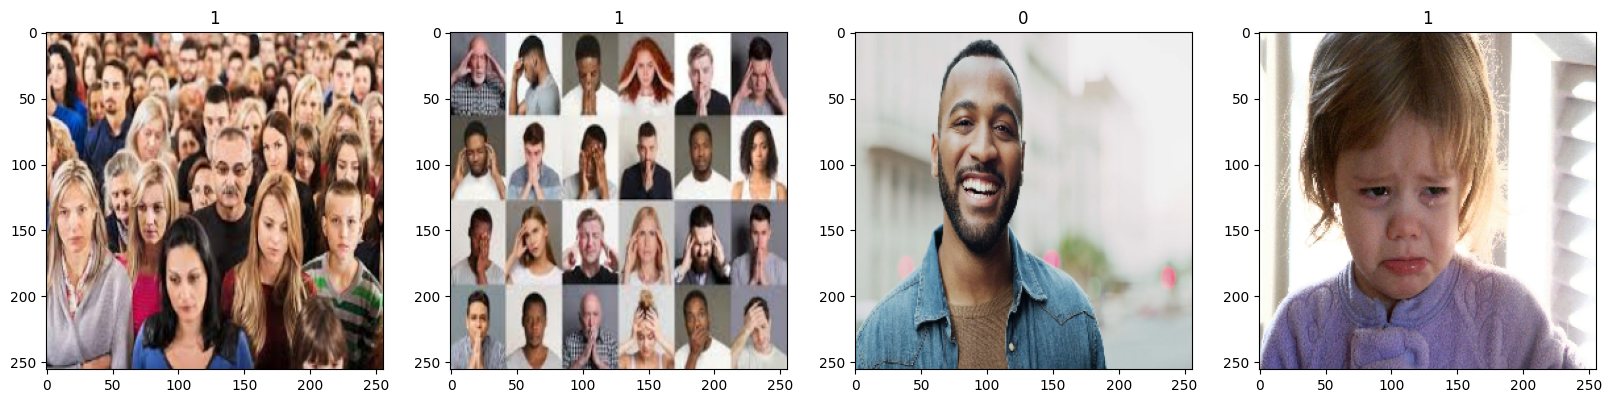

In [91]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### Scale data

In [92]:
data = data.map(lambda x,y : (x/255, y))

In [93]:
data.as_numpy_iterator().next()

(array([[[[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         [[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         [[0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          [0.3372549 , 0.34509805, 0.43529412],
          ...,
          [0.45490196, 0.47058824, 0.5176471 ],
          [0.4509804 , 0.46666667, 0.5137255 ],
          [0.44705883, 0.4627451 , 0.50980395]],
 
         ...,
 
         [[0.03529412, 0.03529412, 0.03529412],
          [0.03529

#### Split data

In [94]:
len(data)

6

In [95]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [96]:
train_size+test_size+val_size

6

In [97]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#### Building Deep Learning Model

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [99]:
model = Sequential()

In [100]:
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\kumay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [102]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Deep Learning Model

In [103]:
logdir = "logs"

In [104]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [105]:
hist = model.fit(train,epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4583 - loss: 0.7652 - val_accuracy: 0.3906 - val_loss: 0.8657
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4401 - loss: 0.8130 - val_accuracy: 0.5938 - val_loss: 0.6185
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5951 - loss: 0.6087 - val_accuracy: 0.7188 - val_loss: 0.5562
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7005 - loss: 0.5703 - val_accuracy: 0.8438 - val_loss: 0.5234
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7109 - loss: 0.6022 - val_accuracy: 0.5938 - val_loss: 0.6606
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5977 - loss: 0.5639 - val_accuracy: 0.8438 - val_loss: 0.4553
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8633 - loss: 0.4603 - val_accuracy: 0.9219 - val_loss: 0.4774
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9388 - loss: 0.4752 - val_accuracy: 0.8438 - val_loss: 0.4313
Epoch 9/20
3/3 

In [106]:
hist.history

{'accuracy': [0.5104166865348816,
  0.4895833432674408,
  0.5729166865348816,
  0.6666666865348816,
  0.6875,
  0.59375,
  0.875,
  0.9166666865348816,
  0.8229166865348816,
  0.8958333134651184,
  0.8958333134651184,
  0.9479166865348816,
  0.875,
  0.90625,
  0.9583333134651184,
  0.96875,
  1.0,
  0.9583333134651184,
  0.9895833134651184,
  0.9791666865348816],
 'loss': [0.7697796821594238,
  0.7622236609458923,
  0.6275964975357056,
  0.5707159042358398,
  0.6035817861557007,
  0.5708311200141907,
  0.47455716133117676,
  0.4676376283168793,
  0.39707526564598083,
  0.28568992018699646,
  0.26682886481285095,
  0.21641935408115387,
  0.27943724393844604,
  0.23381835222244263,
  0.14756184816360474,
  0.1278112381696701,
  0.07692239433526993,
  0.08493548631668091,
  0.08069492131471634,
  0.0682932659983635],
 'val_accuracy': [0.390625,
  0.59375,
  0.71875,
  0.84375,
  0.59375,
  0.84375,
  0.921875,
  0.84375,
  0.90625,
  0.84375,
  0.828125,
  0.84375,
  0.90625,
  0.9375,
 

#### Plot performance


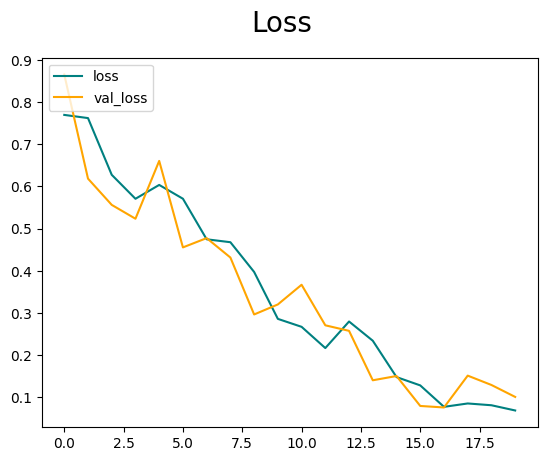

In [107]:
fig = plt.figure()
plt.plot(hist.history["loss"],color = "teal", label = "loss")
plt.plot(hist.history["val_loss"], color = "orange", label = "val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc = "upper left")
plt.show()

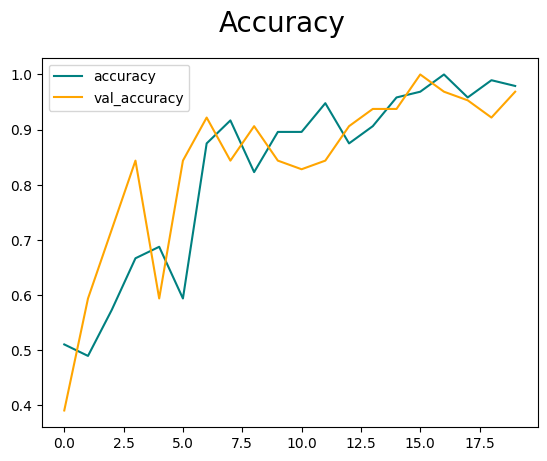

In [108]:
fig = plt.figure()
plt.plot(hist.history["accuracy"],color = "teal", label = "accuracy")
plt.plot(hist.history["val_accuracy"], color = "orange", label = "val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc = "upper left")
plt.show()

#### Evaluate

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [112]:
print(f"Precison: {pre.result().numpy()}, Recall: {re.result().numpy()}, Binary Accuracy: {acc.result().numpy()}")

Precison: 0.8571428656578064, Recall: 1.0, Binary Accuracy: 0.9090909361839294


#### Test

In [113]:
import cv2

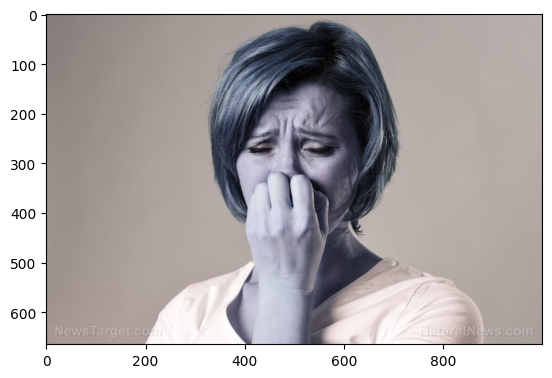

In [127]:
img = cv2.imread("sadtest.jpg")
plt.imshow(img)
plt.show()

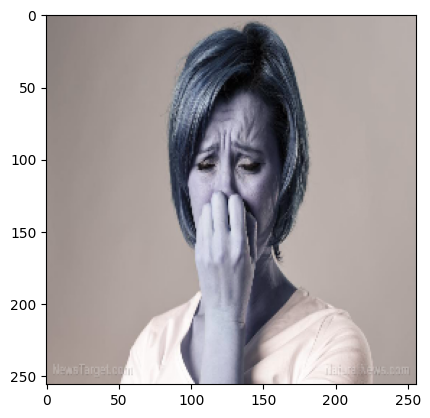

In [128]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [129]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [130]:
yhat

array([[0.87164575]], dtype=float32)

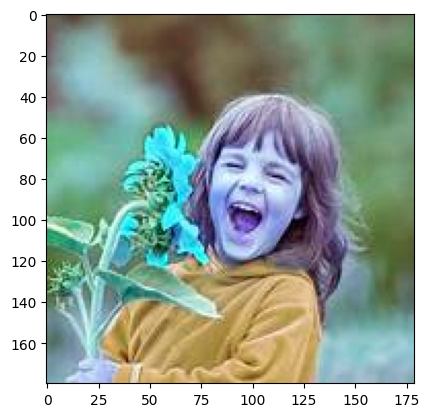

In [122]:
img = cv2.imread("happytest.jpeg")
plt.imshow(img)
plt.show()

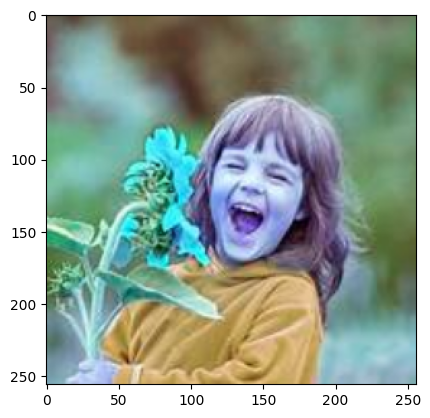

In [123]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [124]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [125]:
yhat

array([[0.45665517]], dtype=float32)

In [131]:
if yhat>0.5:
    print("Sad")
else:
    print("Happy")

Sad


#### Save the model

In [132]:
from tensorflow.keras.models import load_model

In [133]:
model.save(os.path.join("models","happysadmodel.h5"))

In [134]:
new_model = load_model(os.path.join("models","happysadmodel.h5"))

In [135]:
new_model

<Sequential name=sequential_1, built=True>